In [1022]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pygal
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce

import datetime

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import tensorflow as tf

from scikitplot.plotters import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score
pd.set_option('display.max_columns', 500)


In [1023]:
df = pd.read_csv("airbnb_rooms_final.csv")

In [1024]:
coldrop = [i for i in df.columns if i.find("_y") !=-1]

df = df.drop(coldrop, axis = 1)
#df.head()

In [1025]:
#for i in df.columns:
#    print(i, round(df[i].isna().sum()/len(df),3))

In [1026]:
coldrop = ["Name_x", "Host ID_x", "Neighbourhood", "Coordinates", "Location",
           "Listing Url", "Summary", "Description", "Host Name", "Host Location",
           "Host Response Time", "Host Neighbourhood","Host Verifications","Street",
           "Neighbourhood Cleansed","State", "Zipcode", "Market", "Smart Location", "Country Code",
           "Latitude","Longitude", "Calendar Updated", "Calendar last Scraped","Geolocation","Features",
          "Host Response Rate", "Reviews per Month", ]

df = df.drop(coldrop, axis = 1)

In [1027]:
df = df[df['Date last review'].isna() == False].copy()
df.shape

(45859, 46)

In [1028]:
df = df.dropna()

In [1029]:
df["Year last review"] = df['Date last review'].apply( lambda x: int(x.split("-")[0]))
df["Month last review"] = df['Date last review'].apply( lambda x: int(x.split("-")[1]))
df["Day last review"] = df['Date last review'].apply( lambda x: int(x.split("-")[2]))

In [1030]:
df.head()

,Room ID,Room type,Room Price,Minimum nights,Number of reviews,Date last review,Number of reviews per month,Rooms rent by the host,Availibility,Updated Date,City_x,Country_x,Experiences Offered,Host Since,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Year last review,Month last review,Day last review
0,6244643,Entire home/apt,70,1,2,2016-07-24,0.04,1,0,2020-05-10,Paris,France,none,2015-05-02,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",60.0,50.0,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-07-21,2016-07-24,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0,2016,7,24
4,4811943,Entire home/apt,195,21,32,2018-10-02,0.49,1,149,2020-05-10,Paris,France,none,2014-12-13,1.0,1.0,Apartment,Entire home/apt,6.0,2.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",195.0,40.0,6.0,30.0,30.0,1125.0,0.0,0.0,0.0,73.0,31.0,2015-01-02,2016-08-03,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,2018,10,2
5,1497227,Private room,20,3,18,2019-09-10,0.22,1,0,2020-05-14,Berlin,Germany,none,2013-08-07,1.0,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",20.0,10.0,1.0,10.0,2.0,1125.0,3.0,3.0,11.0,167.0,9.0,2013-08-26,2017-04-06,84.0,9.0,9.0,10.0,9.0,10.0,9.0,strict,1.0,2019,9,10
6,10105531,Entire home/apt,10,30,19,2018-08-10,0.48,1,90,2020-06-08,San-francisco,United states,none,2013-11-02,2.0,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Smoke det...",100.0,125.0,1.0,0.0,5.0,1125.0,23.0,53.0,55.0,132.0,1.0,2017-03-05,2017-03-05,60.0,8.0,6.0,10.0,10.0,10.0,6.0,strict,1.0,2018,8,10
9,7083494,Entire home/apt,50,360,2,2016-08-22,0.04,1,0,2020-05-17,Brussels,Belgium,none,2012-06-24,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Dryer...",50.0,20.0,1.0,35.0,360.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-08-07,2016-08-22,100.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1.0,2016,8,22


In [1031]:
df.shape

(27411, 49)

In [1032]:
df = df[df["Year last review"].isin(["2015","2016","2017","2018","2019","2020"])].copy()

df['dateInt']=df["Year last review"].astype(str) + df["Month last review"].astype(str).str.zfill(2)+ df["Day last review"].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')
df["date"] = pd.to_datetime(df['date']).dt.date

#df = df[df["date"] >= datetime.date(2019,6,1)].copy()

In [1033]:
df.head()

,Room ID,Room type,Room Price,Minimum nights,Number of reviews,Date last review,Number of reviews per month,Rooms rent by the host,Availibility,Updated Date,City_x,Country_x,Experiences Offered,Host Since,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Year last review,Month last review,Day last review,dateInt,date
0,6244643,Entire home/apt,70,1,2,2016-07-24,0.04,1,0,2020-05-10,Paris,France,none,2015-05-02,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",60.0,50.0,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-07-21,2016-07-24,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0,2016,7,24,20160724,2016-07-24
4,4811943,Entire home/apt,195,21,32,2018-10-02,0.49,1,149,2020-05-10,Paris,France,none,2014-12-13,1.0,1.0,Apartment,Entire home/apt,6.0,2.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",195.0,40.0,6.0,30.0,30.0,1125.0,0.0,0.0,0.0,73.0,31.0,2015-01-02,2016-08-03,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,2018,10,2,20181002,2018-10-02
5,1497227,Private room,20,3,18,2019-09-10,0.22,1,0,2020-05-14,Berlin,Germany,none,2013-08-07,1.0,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",20.0,10.0,1.0,10.0,2.0,1125.0,3.0,3.0,11.0,167.0,9.0,2013-08-26,2017-04-06,84.0,9.0,9.0,10.0,9.0,10.0,9.0,strict,1.0,2019,9,10,20190910,2019-09-10
6,10105531,Entire home/apt,10,30,19,2018-08-10,0.48,1,90,2020-06-08,San-francisco,United states,none,2013-11-02,2.0,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Smoke det...",100.0,125.0,1.0,0.0,5.0,1125.0,23.0,53.0,55.0,132.0,1.0,2017-03-05,2017-03-05,60.0,8.0,6.0,10.0,10.0,10.0,6.0,strict,1.0,2018,8,10,20180810,2018-08-10
9,7083494,Entire home/apt,50,360,2,2016-08-22,0.04,1,0,2020-05-17,Brussels,Belgium,none,2012-06-24,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Dryer...",50.0,20.0,1.0,35.0,360.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-08-07,2016-08-22,100.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1.0,2016,8,22,20160822,2016-08-22


In [1034]:
df['date'] = pd.to_datetime(df['date']).dt.date
df["Time"] = df["date"].map(lambda x:x.strftime('%Y%m%d')).astype(int)
#df["Time"] = df["date"].map(lambda x:x.strftime('%Y%m')).astype(int)

cat_fh = df[['Time']].drop_duplicates().sort_values('Time',ascending=True).reset_index(drop=True).reset_index()
cat_fh.set_index('Time',inplace=True)

df['Time'].replace(cat_fh.to_dict()['index'],inplace=True)

In [1035]:
df.head()

,Room ID,Room type,Room Price,Minimum nights,Number of reviews,Date last review,Number of reviews per month,Rooms rent by the host,Availibility,Updated Date,City_x,Country_x,Experiences Offered,Host Since,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Year last review,Month last review,Day last review,dateInt,date,Time
0,6244643,Entire home/apt,70,1,2,2016-07-24,0.04,1,0,2020-05-10,Paris,France,none,2015-05-02,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Pull-out Sofa,"TV,Internet,Wireless Internet,Kitchen,Smoking ...",60.0,50.0,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-07-21,2016-07-24,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0,2016,7,24,20160724,2016-07-24,481
4,4811943,Entire home/apt,195,21,32,2018-10-02,0.49,1,149,2020-05-10,Paris,France,none,2014-12-13,1.0,1.0,Apartment,Entire home/apt,6.0,2.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",195.0,40.0,6.0,30.0,30.0,1125.0,0.0,0.0,0.0,73.0,31.0,2015-01-02,2016-08-03,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0,2018,10,2,20181002,2018-10-02,1266
5,1497227,Private room,20,3,18,2019-09-10,0.22,1,0,2020-05-14,Berlin,Germany,none,2013-08-07,1.0,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking all...",20.0,10.0,1.0,10.0,2.0,1125.0,3.0,3.0,11.0,167.0,9.0,2013-08-26,2017-04-06,84.0,9.0,9.0,10.0,9.0,10.0,9.0,strict,1.0,2019,9,10,20190910,2019-09-10,1605
6,10105531,Entire home/apt,10,30,19,2018-08-10,0.48,1,90,2020-06-08,San-francisco,United states,none,2013-11-02,2.0,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Smoke det...",100.0,125.0,1.0,0.0,5.0,1125.0,23.0,53.0,55.0,132.0,1.0,2017-03-05,2017-03-05,60.0,8.0,6.0,10.0,10.0,10.0,6.0,strict,1.0,2018,8,10,20180810,2018-08-10,1213
9,7083494,Entire home/apt,50,360,2,2016-08-22,0.04,1,0,2020-05-17,Brussels,Belgium,none,2012-06-24,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Heating,Washer,Dryer...",50.0,20.0,1.0,35.0,360.0,1125.0,0.0,0.0,0.0,0.0,2.0,2016-08-07,2016-08-22,100.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1.0,2016,8,22,20160822,2016-08-22,510


In [1036]:
varr = [i for i in df.columns if i not in ["Room ID", "Room type", "Date last review", "Updated Date",
                                     "Experiences Offered","Host Since",
                                      "Bed Type","Amenities","First Review","Last Review",
                                      "Year last review", "Month last review","Day last review", "dateInt",
                                      "date","Time"]]

df = df[varr].copy()
varc = ["Bathrooms", "Bedrooms","Beds","Cleaning Fee","Maximum Nights","Minimum Nights",
       "Number of Reviews","Number of reviews per month","Price","Rooms rent by the host",
       "Review Scores Rating", "Review Scores Communication", "Review Scores Location",
       "Guests Included"]

In [1037]:
df.head()

,Room Price,Minimum nights,Number of reviews,Number of reviews per month,Rooms rent by the host,Availibility,City_x,Country_x,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,70,1,2,0.04,1,0,Paris,France,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,60.0,50.0,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0
4,195,21,32,0.49,1,149,Paris,France,1.0,1.0,Apartment,Entire home/apt,6.0,2.0,2.0,2.0,195.0,40.0,6.0,30.0,30.0,1125.0,0.0,0.0,0.0,73.0,31.0,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0
5,20,3,18,0.22,1,0,Berlin,Germany,1.0,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,20.0,10.0,1.0,10.0,2.0,1125.0,3.0,3.0,11.0,167.0,9.0,84.0,9.0,9.0,10.0,9.0,10.0,9.0,strict,1.0
6,10,30,19,0.48,1,90,San-francisco,United states,2.0,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,100.0,125.0,1.0,0.0,5.0,1125.0,23.0,53.0,55.0,132.0,1.0,60.0,8.0,6.0,10.0,10.0,10.0,6.0,strict,1.0
9,50,360,2,0.04,1,0,Brussels,Belgium,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,50.0,20.0,1.0,35.0,360.0,1125.0,0.0,0.0,0.0,0.0,2.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1.0


In [1038]:
#tad = pd.get_dummies(df, columns=['Room Type','City_x', 'Country_x'])
tad = df.copy()

In [1039]:
tad.head()

,Room Price,Minimum nights,Number of reviews,Number of reviews per month,Rooms rent by the host,Availibility,City_x,Country_x,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
0,70,1,2,0.04,1,0,Paris,France,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,60.0,50.0,1.0,0.0,1.0,1125.0,0.0,0.0,0.0,0.0,2.0,100.0,10.0,9.0,10.0,9.0,10.0,10.0,flexible,1.0
4,195,21,32,0.49,1,149,Paris,France,1.0,1.0,Apartment,Entire home/apt,6.0,2.0,2.0,2.0,195.0,40.0,6.0,30.0,30.0,1125.0,0.0,0.0,0.0,73.0,31.0,94.0,10.0,9.0,10.0,10.0,10.0,9.0,moderate,1.0
5,20,3,18,0.22,1,0,Berlin,Germany,1.0,1.0,Apartment,Private room,2.0,1.0,1.0,1.0,20.0,10.0,1.0,10.0,2.0,1125.0,3.0,3.0,11.0,167.0,9.0,84.0,9.0,9.0,10.0,9.0,10.0,9.0,strict,1.0
6,10,30,19,0.48,1,90,San-francisco,United states,2.0,2.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,100.0,125.0,1.0,0.0,5.0,1125.0,23.0,53.0,55.0,132.0,1.0,60.0,8.0,6.0,10.0,10.0,10.0,6.0,strict,1.0
9,50,360,2,0.04,1,0,Brussels,Belgium,1.0,1.0,Apartment,Entire home/apt,2.0,1.0,1.0,1.0,50.0,20.0,1.0,35.0,360.0,1125.0,0.0,0.0,0.0,0.0,2.0,100.0,10.0,10.0,10.0,10.0,9.0,10.0,strict,1.0


In [1219]:
varc = ['Minimum nights', 'Number of reviews','Number of reviews per month', 
 'Rooms rent by the host', 'Availibility','Host Listings Count','Host Total Listings Count',
 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count']


In [1220]:
pi = make_pipeline(SimpleImputer(strategy='median'),
                   StandardScaler(),
                   PCA(n_components=20),
                   MinMaxScaler())

pi.fit(tad[varc])

pi.steps[-2][1].explained_variance_ratio_.cumsum()

array([0.15186812, 0.29179134, 0.41036943, 0.52293298, 0.60727909,
       0.65770406, 0.70052775, 0.73504875, 0.7642651 , 0.7927353 ,
       0.81992021, 0.84409664, 0.86299953, 0.88128518, 0.8969919 ,
       0.91178172, 0.92546096, 0.93845579, 0.95093768, 0.96146214])

In [1221]:
#tad = tad.dropna()
tad.shape

(27270, 36)

In [1222]:
tad.columns

Index(['Room Price', 'Minimum nights', 'Number of reviews',
       'Number of reviews per month', 'Rooms rent by the host', 'Availibility',
       'City_x', 'Country_x', 'Host Listings Count',
       'Host Total Listings Count', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count'],
      dtype='object')

In [1223]:
X = pd.DataFrame(pi.transform(tad[varc]),columns=['x_%d'%(i+1) for i in range(20)])
#y = tad[['target']]
#y = (tad["Review Scores Rating"]>= 90).astype(int)
y = tad['Price']

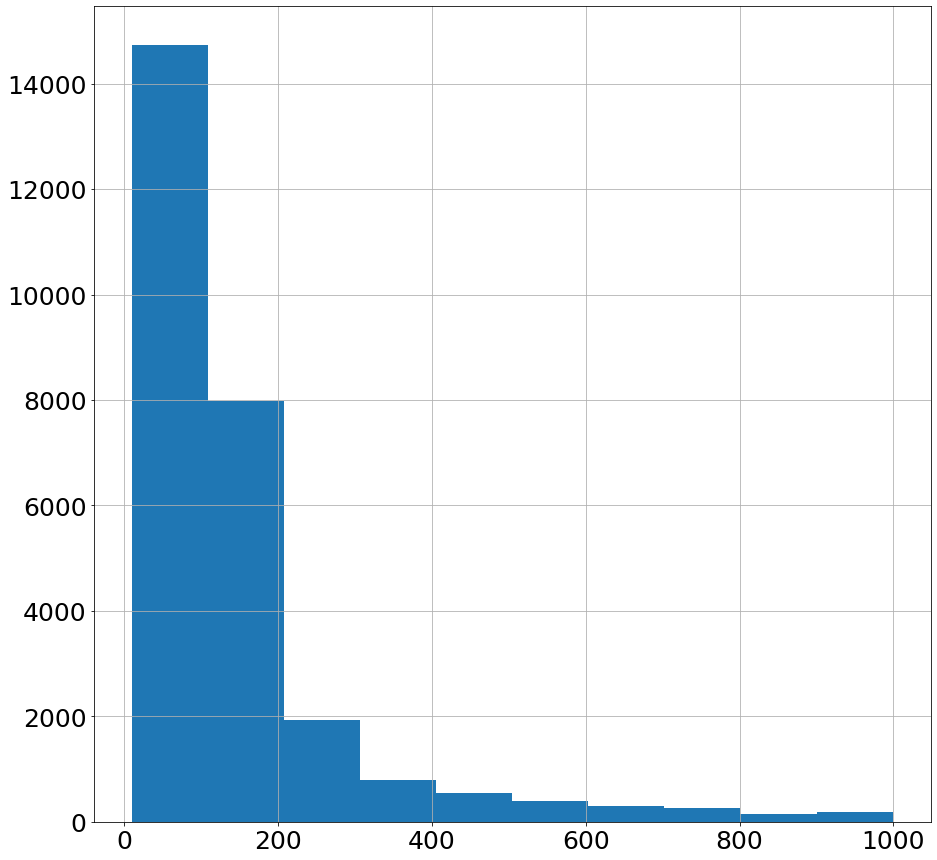

In [1224]:
y.hist()

In [1225]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [1131]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(Xt, yt)

/Users/Victor/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1132]:
lr.score(Xt,yt)

0.8917701293938918

In [1133]:
accuracy_score(y_true=yt,y_pred=lr.predict(Xt)),accuracy_score(y_true=yv,y_pred=lr.predict(Xv))

(0.8917701293938918, 0.8936560322698937)

In [1134]:
roc_auc_score(y_true=yt,y_score=lr.predict(Xt)),roc_auc_score(y_true=yv,y_score=lr.predict(Xv))

(0.6898854304385174, 0.6869665727368077)

In [1135]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

tf.random.set_seed(0)
dst = tf.data.Dataset.from_tensor_slices((tf.cast(Xt,tf.float32),tf.cast(yt,tf.float32)))
dsv = tf.data.Dataset.from_tensor_slices((tf.cast(Xv,tf.float32),tf.cast(yv,tf.float32)))
print(len(dst),len(dsv))

19089 8181


In [1138]:
modelo = Sequential()
modelo.add(Dense(10,activation='relu',name='capa1',input_shape=(20,)))
modelo.add(Dense(45,activation='tanh',name='capa2'))
modelo.add(Dense(30,activation='relu',name='capa3'))
modelo.add(Dense(25,activation='tanh',name='capa4'))
modelo.add(Dense(1,activation='sigmoid',name='salida'))
modelo.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 10)                210       
_________________________________________________________________
capa2 (Dense)                (None, 45)                495       
_________________________________________________________________
capa3 (Dense)                (None, 30)                1380      
_________________________________________________________________
capa4 (Dense)                (None, 25)                775       
_________________________________________________________________
salida (Dense)               (None, 1)                 26        
Total params: 2,886
Trainable params: 2,886
Non-trainable params: 0
_________________________________________________________________


In [1141]:
%%time
modelo.compile(optimizer="adam",
               metrics="accuracy",
               #loss='sparse_categorical_crossentropy')
               loss='binary_crossentropy')

epocas = 300
tam_entrenamiento = len(Xt)
tam_lote = int(tam_entrenamiento/3)
pasos_por_epoca = np.ceil(tam_entrenamiento/tam_lote)

dt = dst.shuffle(buffer_size=tam_entrenamiento)
dt = dt.repeat()
dt = dt.batch(batch_size=tam_lote)
dt = dt.prefetch(buffer_size=tam_lote)
historia = modelo.fit(dt,epochs=epocas,steps_per_epoch=pasos_por_epoca,verbose=True)

Epoch 1/300
3/3 [==============================] - 0s 22ms/step - loss: 0.3303 - accuracy: 0.8653
Epoch 2/300
3/3 [==============================] - 0s 20ms/step - loss: 0.3281 - accuracy: 0.8665
Epoch 3/300
3/3 [==============================] - 0s 28ms/step - loss: 0.3263 - accuracy: 0.8671
Epoch 4/300
3/3 [==============================] - 0s 44ms/step - loss: 0.3249 - accuracy: 0.8675
Epoch 5/300
3/3 [==============================] - 0s 24ms/step - loss: 0.3236 - accuracy: 0.8695
Epoch 6/300
3/3 [==============================] - 0s 27ms/step - loss: 0.3226 - accuracy: 0.8678
Epoch 7/300
3/3 [==============================] - 0s 27ms/step - loss: 0.3216 - accuracy: 0.8702
Epoch 8/300
3/3 [==============================] - 0s 58ms/step - loss: 0.3197 - accuracy: 0.8701
Epoch 9/300
3/3 [==============================] - 0s 30ms/step - loss: 0.3186 - accuracy: 0.8710
Epoch 10/300
3/3 [==============================] - 0s 27ms/step - loss: 0.3171 - accuracy: 0.8710
Epoch 11/300
3/3 [=

3/3 [==============================] - 0s 45ms/step - loss: 0.2270 - accuracy: 0.9066
Epoch 166/300
3/3 [==============================] - 0s 37ms/step - loss: 0.2265 - accuracy: 0.9068
Epoch 167/300
3/3 [==============================] - 0s 28ms/step - loss: 0.2263 - accuracy: 0.9065
Epoch 168/300
3/3 [==============================] - 0s 27ms/step - loss: 0.2272 - accuracy: 0.9070
Epoch 169/300
3/3 [==============================] - 0s 32ms/step - loss: 0.2263 - accuracy: 0.9063
Epoch 170/300
3/3 [==============================] - 0s 26ms/step - loss: 0.2265 - accuracy: 0.9064
Epoch 171/300
3/3 [==============================] - 0s 31ms/step - loss: 0.2265 - accuracy: 0.9053
Epoch 172/300
3/3 [==============================] - 0s 32ms/step - loss: 0.2261 - accuracy: 0.9069
Epoch 173/300
3/3 [==============================] - 0s 29ms/step - loss: 0.2263 - accuracy: 0.9066
Epoch 174/300
3/3 [==============================] - 0s 31ms/step - loss: 0.2258 - accuracy: 0.9065
Epoch 175/300


3/3 [==============================] - 0s 30ms/step - loss: 0.2227 - accuracy: 0.9084
Epoch 248/300
3/3 [==============================] - 0s 27ms/step - loss: 0.2224 - accuracy: 0.9086
Epoch 249/300
3/3 [==============================] - 0s 28ms/step - loss: 0.2224 - accuracy: 0.9082
Epoch 250/300
3/3 [==============================] - 0s 25ms/step - loss: 0.2224 - accuracy: 0.9074
Epoch 251/300
3/3 [==============================] - 0s 24ms/step - loss: 0.2223 - accuracy: 0.9083
Epoch 252/300
3/3 [==============================] - 0s 27ms/step - loss: 0.2224 - accuracy: 0.9086
Epoch 253/300
3/3 [==============================] - 0s 23ms/step - loss: 0.2228 - accuracy: 0.9087
Epoch 254/300
3/3 [==============================] - 0s 24ms/step - loss: 0.2228 - accuracy: 0.9088
Epoch 255/300
3/3 [==============================] - 0s 26ms/step - loss: 0.2226 - accuracy: 0.9086
Epoch 256/300
3/3 [==============================] - 0s 25ms/step - loss: 0.2222 - accuracy: 0.9087
Epoch 257/300


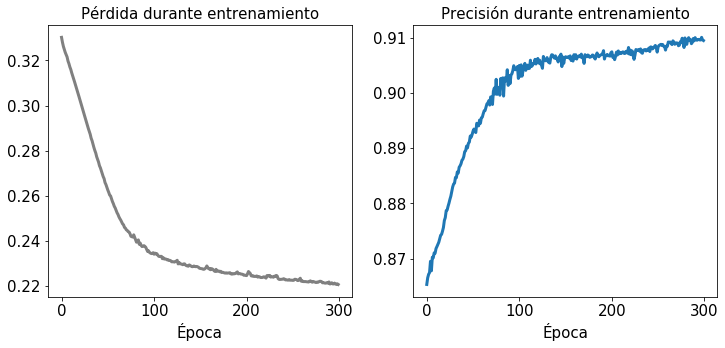

In [1143]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(historia.history['loss'],lw=3, color = "gray")
ax.set_title('Pérdida durante entrenamiento',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(historia.history['accuracy'],lw=3)
ax.set_title('Precisión durante entrenamiento',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

In [1144]:
roc_auc_score(y_score =modelo.predict(np.stack([x for x, y in dst], axis=0)),y_true=yt)

0.9363525385090092

In [1145]:
roc_auc_score(y_score =modelo.predict(np.stack([x for x, y in dsv], axis=0)),y_true=yv)


0.9369697848810121

In [1147]:
accuracy_score(y_pred =modelo.predict_classes(Xv),y_true=yv)

0.9046571323799046

In [1148]:
accuracy_score(y_pred =modelo.predict_classes(Xt),y_true=yt)

0.9095290481429096

In [1160]:
tabla = tad.copy()

In [1161]:
tabla[">90"] = (tabla["Review Scores Rating"]>= 90).astype(int)

In [1165]:
tabla.groupby(">90").mean()

,Room Price,Minimum nights,Number of reviews,Number of reviews per month,Rooms rent by the host,Availibility,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count
>90,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,142.762762,6.454193,57.417958,0.964877,10.872151,158.459435,11.551960,11.551960,3.678441,1.218551,1.419098,2.165679,130.671832,53.986326,1.779854,13.319280,3.320647,720578.851869,8.521878,20.438241,34.451686,175.386737,22.444622,82.268687,8.794439,8.430720,9.198268,9.222197,9.050593,8.512990,8.917046
1,162.801110,6.720916,78.621493,1.379722,4.313784,149.871646,4.293025,4.293025,3.619177,1.254960,1.462591,2.082423,155.280220,60.695525,1.825103,15.681846,3.342933,281099.498776,8.123853,19.796565,33.770693,169.194476,27.975876,96.409536,9.801110,9.681759,9.882266,9.899310,9.624727,9.591338,3.371777


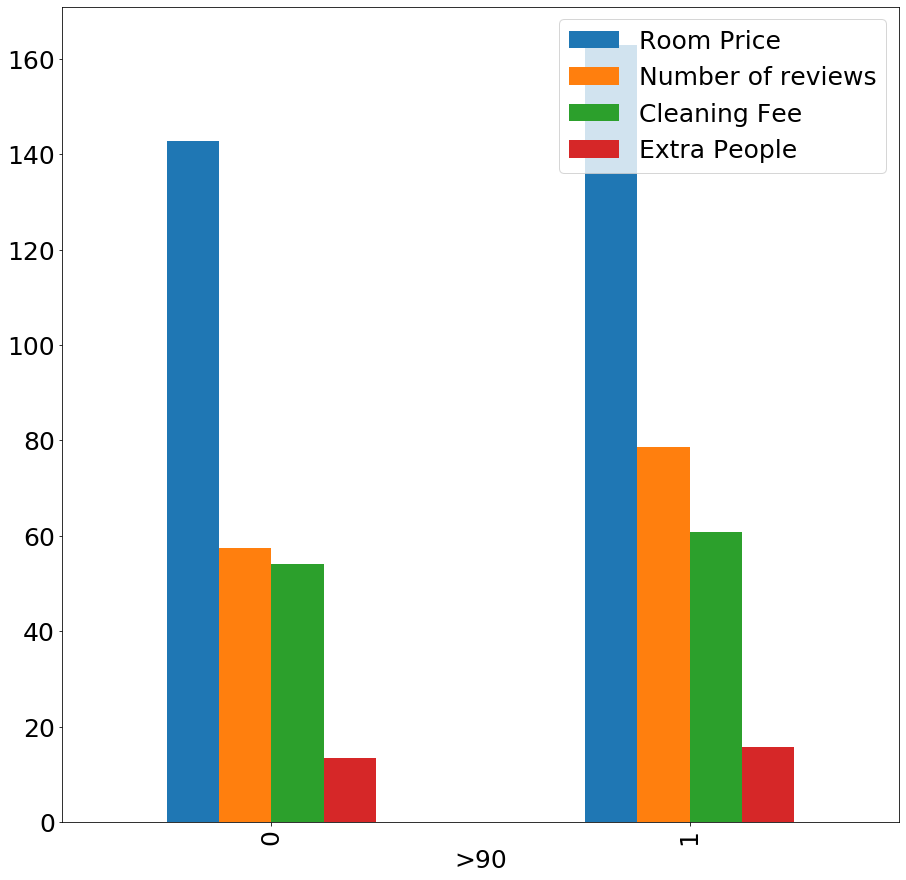

In [1190]:
tabla[[">90", "Room Price", "Number of reviews", "Cleaning Fee", "Extra People"]].groupby(">90").mean().plot(kind="bar")
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 25})


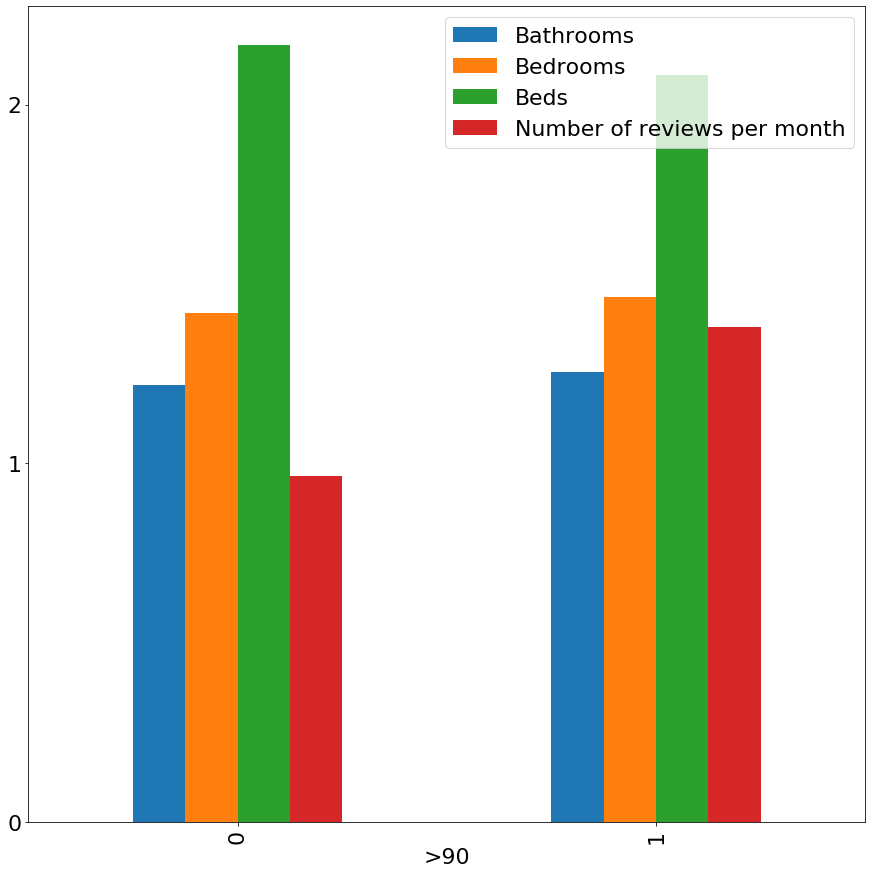

In [1185]:
tabla[[">90", "Bathrooms", "Bedrooms", "Beds", "Number of reviews per month"]].groupby(">90").mean().plot(kind="bar")
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 100})



In [1230]:
%%time

modelo = Sequential()
modelo.add(Dense(5,activation='relu',name='capa1',input_shape=(20,)))
modelo.add(Dense(25,activation='relu',name='capa2'))
modelo.add(Dense(40,activation='relu',name='capa3'))

modelo.add(Dense(1,activation='linear',name='salida'))
modelo.summary()

optimizer = tf.keras.optimizers.RMSprop(0.001)

modelo.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

epocas = 200
tam_entrenamiento = len(Xt)
tam_lote = int(tam_entrenamiento/3)
pasos_por_epoca = np.ceil(tam_entrenamiento/tam_lote)

dt = dst.shuffle(buffer_size=tam_entrenamiento)
dt = dt.repeat()
dt = dt.batch(batch_size=tam_lote)
dt = dt.prefetch(buffer_size=tam_lote)
historia = modelo.fit(dt,epochs=epocas,steps_per_epoch=pasos_por_epoca,verbose=True)


Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
capa1 (Dense)                (None, 5)                 105       
_________________________________________________________________
capa2 (Dense)                (None, 25)                150       
_________________________________________________________________
capa3 (Dense)                (None, 40)                1040      
_________________________________________________________________
salida (Dense)               (None, 1)                 41        
Total params: 1,336
Trainable params: 1,336
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6291 - mae: 0.7453 - mse: 0.6291
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.4377 - mae: 0.6427 - mse: 0.4377
Epoch 3/200
3/3 [==================

3/3 [==============================] - 0s 20ms/step - loss: 0.0894 - mae: 0.1913 - mse: 0.0894
Epoch 144/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0898 - mae: 0.2047 - mse: 0.0898
Epoch 145/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0922 - mae: 0.1906 - mse: 0.0922
Epoch 146/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0902 - mae: 0.2043 - mse: 0.0902
Epoch 147/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0910 - mae: 0.1912 - mse: 0.0910
Epoch 148/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0908 - mae: 0.2062 - mse: 0.0908
Epoch 149/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0916 - mae: 0.1904 - mse: 0.0916
Epoch 150/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0921 - mae: 0.2087 - mse: 0.0921
Epoch 151/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0902 - mae: 0.1885 - mse: 0.0902
Epoch 152/200
3/3 [==============

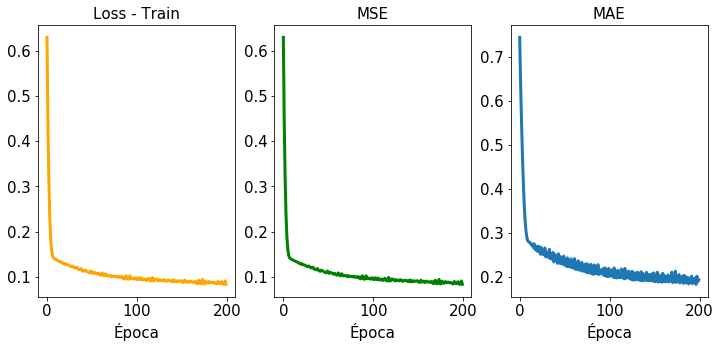

In [1238]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,3,1)
ax.plot(historia.history['loss'],lw=3, color = "orange")
ax.set_title('Loss - Train',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.plot(historia.history['mse'],lw=3, color = "green")
ax.set_title('MSE',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.plot(historia.history['mae'],lw=3)
ax.set_title('MAE',size=15)
ax.set_xlabel('Época',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)


plt.show()

In [1252]:
tad.sort_values(["Price"], ascending = False).head(20).groupby("City_x").count()

,Room Price,Minimum nights,Number of reviews,Number of reviews per month,Rooms rent by the host,Availibility,Country_x,Host Listings Count,Host Total Listings Count,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count
City_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Austin,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Chicago,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Copenhagen,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Hong-kong,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Los-angeles,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mallorca,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
San-francisco,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Washington-dc,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [1246]:
tad.shape

(27270, 36)